<a href="https://colab.research.google.com/github/soumyamargam/soumyamargam/blob/main/Food_Delivery_Time_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

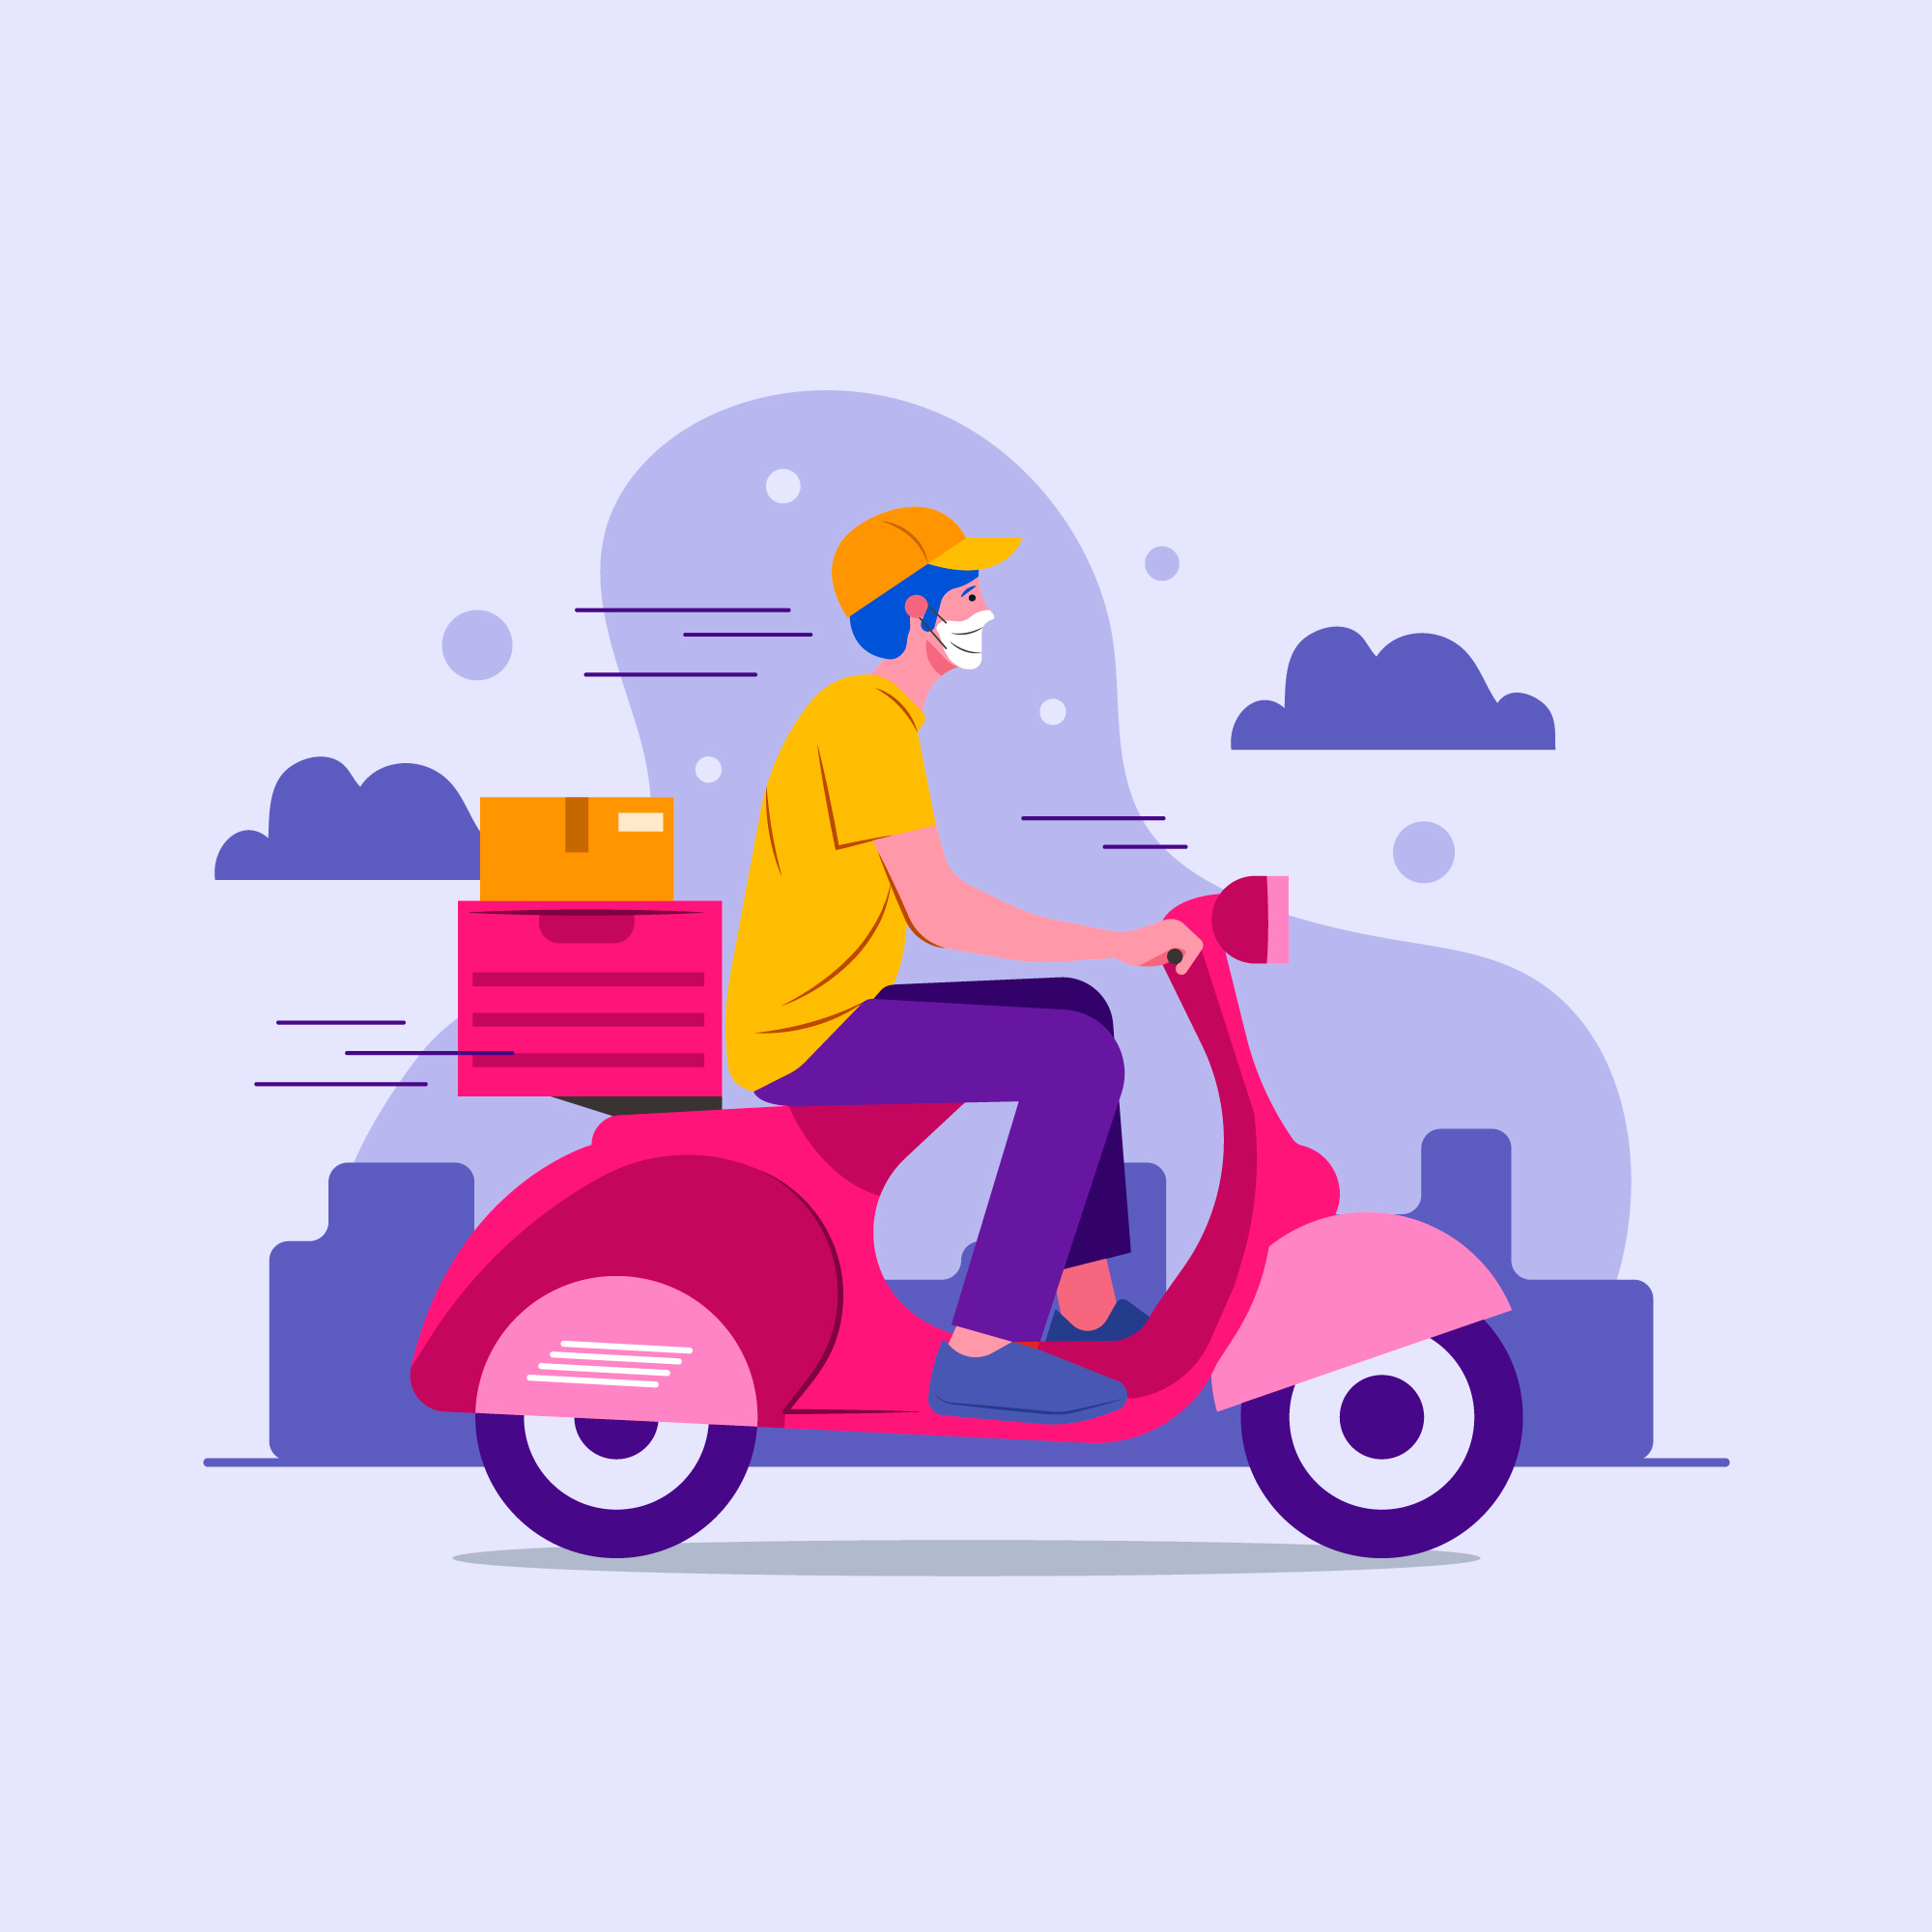

This project is about the prediction of food delivery time in real-time, we will calculate the distance between the food preparation point and the point of food consumption. After finding the distance between the restaurant and the delivery locations, we will find relationships between the time taken by delivery partners to deliver the food in the past for the same distance.

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px

data = pd.read_csv("/content/deliverytime.txt")
print(data.head())

     ID Delivery_person_ID  Delivery_person_Age  Delivery_person_Ratings  \
0  4607     INDORES13DEL02                   37                      4.9   
1  B379     BANGRES18DEL02                   34                      4.5   
2  5D6D     BANGRES19DEL01                   23                      4.4   
3  7A6A    COIMBRES13DEL02                   38                      4.7   
4  70A2     CHENRES12DEL01                   32                      4.6   

   Restaurant_latitude  Restaurant_longitude  Delivery_location_latitude  \
0            22.745049             75.892471                   22.765049   
1            12.913041             77.683237                   13.043041   
2            12.914264             77.678400                   12.924264   
3            11.003669             76.976494                   11.053669   
4            12.972793             80.249982                   13.012793   

   Delivery_location_longitude Type_of_order Type_of_vehicle  Time_taken(min)  
0     

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          45593 non-null  int64  
 3   Delivery_person_Ratings      45593 non-null  float64
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Type_of_order                45593 non-null  object 
 9   Type_of_vehicle              45593 non-null  object 
 10  Time_taken(min)              45593 non-null  int64  
dtypes: float64(5), int64(2), object(4)
memory usage: 3.8+ MB


# Data Cleaning

In [3]:
data.isnull().sum()

ID                             0
Delivery_person_ID             0
Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Type_of_order                  0
Type_of_vehicle                0
Time_taken(min)                0
dtype: int64

This dataset does not contain any null values.
Now, we will use the haversine formula to calculate the distance between two locations based on their latitudes and longitudes.

In [4]:
# Set the earth's radius (in kilometers)
R = 6371

# Convert degrees to radians
def deg_to_rad(degrees):
    return degrees * (np.pi/180)

# Function to calculate the distance between two points using the haversine formula
def distcalculate(lat1, lon1, lat2, lon2):
    d_lat = deg_to_rad(lat2-lat1)
    d_lon = deg_to_rad(lon2-lon1)
    a = np.sin(d_lat/2)**2 + np.cos(deg_to_rad(lat1)) * np.cos(deg_to_rad(lat2)) * np.sin(d_lon/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    return R * c
  
# Calculate the distance between each pair of points
data['distance'] = np.nan

for i in range(len(data)):
    data.loc[i, 'distance'] = distcalculate(data.loc[i, 'Restaurant_latitude'], 
                                        data.loc[i, 'Restaurant_longitude'], 
                                        data.loc[i, 'Delivery_location_latitude'], 
                                        data.loc[i, 'Delivery_location_longitude'])

In [5]:
print(data.head())

     ID Delivery_person_ID  Delivery_person_Age  Delivery_person_Ratings  \
0  4607     INDORES13DEL02                   37                      4.9   
1  B379     BANGRES18DEL02                   34                      4.5   
2  5D6D     BANGRES19DEL01                   23                      4.4   
3  7A6A    COIMBRES13DEL02                   38                      4.7   
4  70A2     CHENRES12DEL01                   32                      4.6   

   Restaurant_latitude  Restaurant_longitude  Delivery_location_latitude  \
0            22.745049             75.892471                   22.765049   
1            12.913041             77.683237                   13.043041   
2            12.914264             77.678400                   12.924264   
3            11.003669             76.976494                   11.053669   
4            12.972793             80.249982                   13.012793   

   Delivery_location_longitude Type_of_order Type_of_vehicle  Time_taken(min)  \
0    

# Exploratory Data Analysis

In [7]:
figure = px.scatter(data_frame = data, 
                    x="distance",
                    y="Time_taken(min)", 
                    size="Time_taken(min)", 
                    trendline="ols", 
                    title = "Relationship Between Distance and Time Taken")
figure.show()

There is a consistent relationship between the time taken and the distance travelled to deliver the food. 
Most delivery partners deliver food within 25-30 minutes.



In [8]:
figure = px.scatter(data_frame = data, 
                    x="Delivery_person_Age",
                    y="Time_taken(min)", 
                    size="Time_taken(min)", 
                    color = "distance",
                    trendline="ols", 
                    title = "Relationship Between Time Taken and Age")
figure.show()

In [9]:
figure = px.scatter(data_frame = data, 
                    x="Delivery_person_Ratings",
                    y="Time_taken(min)", 
                    size="Time_taken(min)", 
                    color = "distance",
                    trendline="ols", 
                    title = "Relationship Between Time Taken and Ratings")
figure.show()

In [10]:
fig = px.box(data, 
             x="Type_of_vehicle",
             y="Time_taken(min)", 
             color="Type_of_order")
fig.show()

So the features that contribute most to the food delivery time based on our analysis are:

1) Age of the delivery partner
2) Ratings of the delivery partner
3) Distance between the restaurant and the delivery location

Food Delivery Time Prediction Model

In [11]:
#splitting data
from sklearn.model_selection import train_test_split
x = np.array(data[["Delivery_person_Age", 
                   "Delivery_person_Ratings", 
                   "distance"]])
y = np.array(data[["Time_taken(min)"]])
xtrain, xtest, ytrain, ytest = train_test_split(x, y, 
                                                test_size=0.10, 
                                                random_state=42)

# creating the LSTM neural network model
from keras.models import Sequential
from keras.layers import Dense, LSTM
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (xtrain.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 3, 128)            66560     
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 25)                1625      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 117,619
Trainable params: 117,619
Non-trainable params: 0
_________________________________________________________________


# Training the model

In [12]:
# training the model
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(xtrain, ytrain, batch_size=1, epochs=9)

Epoch 1/9
41033/41033 [==============================] - 235s 6ms/step - loss: 69.1386
Epoch 2/9
41033/41033 [==============================] - 217s 5ms/step - loss: 64.0987
Epoch 3/9
41033/41033 [==============================] - 217s 5ms/step - loss: 61.6198
Epoch 4/9
41033/41033 [==============================] - 234s 6ms/step - loss: 60.4743
Epoch 5/9
41033/41033 [==============================] - 223s 5ms/step - loss: 59.9221
Epoch 6/9
41033/41033 [==============================] - 223s 5ms/step - loss: 59.5236
Epoch 7/9
41033/41033 [==============================] - 230s 6ms/step - loss: 58.9807
Epoch 8/9
41033/41033 [==============================] - 225s 5ms/step - loss: 58.8907
Epoch 9/9
41033/41033 [==============================] - 224s 5ms/step - loss: 58.5720


# Testing the performance of the model

In [13]:
print("Food Delivery Time Prediction")
a = int(input("Age of Delivery Partner: "))
b = float(input("Ratings of Previous Deliveries: "))
c = int(input("Total Distance: "))

features = np.array([[a, b, c]])
print("Predicted Delivery Time in Minutes = ", model.predict(features))

Food Delivery Time Prediction
Age of Delivery Partner: 30
Ratings of Previous Deliveries: 4
Total Distance: 50
1/1 [==============================] - 1s 1s/step
Predicted Delivery Time in Minutes =  [[33.15479]]
